<img src = "https://drive.google.com/uc?export=view&id=1WaM3ez8iLaUk3VyWNYZQuifnvbEX4vbK" alt = "Encabezado MLDS" width = "100%">  </img>


# **Preparación de los datos con *pandas***
---
<img src = "https://pandas.pydata.org/static/img/pandas.svg" alt = "pandas Logo" width = "70%">  </img>

En este material se discutirán las actividades propias de la fase de preparación de datos en un proyecto de análisis de datos, utilizando la librería de *Python* para el análisis y manipulación de datos ***pandas***. En las guías anteriores se discutió el proceso de entendimiento de datos, en el que se presentaron formas de obtener y explorar conjuntos de datos. Si bien se discutió el proceso de combinación y exploración de datos, esto se puede realizar iterativamente con las actividades de limpieza y preprocesamiento de los conjuntos de datos que serán discutidas en la presente guía. 

Algunas de estas actividades que se presentarán son la selección y modificación de subconjuntos de datos, la limpieza y acondicionamiento de datos, la eliminación, combinación, división y adición de características y demás tareas avanzadas comunes de preprocesamiento y transformación, necesarias en muchos escenarios de análisis y modelado que se discutirán en la siguiente unidad y en el **Módulo 2: Introducción a *Machine Learning* con *Python***.

## **1. Importar *pandas***
---
Este material fue realizado con las siguientes versiones:

- Python: 3.6.9
- NumPy: 1.19.5
- pandas: 1.1.5


In [1]:
import numpy as np
import pandas as pd

In [2]:
!python --version
print('NumPy', np.__version__)
print('pandas', pd.__version__)

Python 3.8.3
NumPy 1.19.5
pandas 1.0.5


### **1.1. Datos**
---
En varios ejemplos de este material se trabajará usando como referencia el [*dataset* de *Kaggle*](https://www.kaggle.com/crawford/80-cereals) correspondiente a la información nutricional de un listado de 80 cereales. En varios ejemplos de este material se trabajará usando como referencia el [*dataset* de *Kaggle*](https://www.kaggle.com/crawford/80-cereals) correspondiente a la información nutricional de un listado de 80 cereales. 

In [3]:
url = 'https://drive.google.com/uc?export=download&id=1cVDBakqy6tSwCwgzAtf08hNvjHk8a6hv'

df = pd.read_csv(url)

## **2. Selección y modificación de datos**
---

*Pandas* distingue entre dos tipos de índices usados para la selección de datos. Estas son las etiquetas y las posiciones de los objetos. Cada objeto en *pandas* (tanto las *Series* como los *DataFrame*) son objetos ordenados de datos asociados a un objeto de tipo **Index** cuyas etiquetas corresponden a cada fila o columna. Los índices son usados para poder acceder velozmente a los datos y para alinear tablas de gran tamaño. A continuación se discutirán las distintas formas permitidas de utilizar para seleccionar un subconjunto de los datos.

### **2.1. Selección y modificación básica**
---

Los objetos de *pandas* heredan la notación de llaves cuadradas para la selección de objetos. Esta funciona como en los diccionarios de *Python*. 

En los objetos *Series* el valor retornado con la selección básica corresponde al valor asociado a la etiqueta.

In [4]:
ser = pd.Series([1, 2, 3], index = ['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [5]:
ser['a']

1

In [6]:
# También se puede modificar directamente el contenido de los datos.

ser['a'] = 0
ser

a    0
b    2
c    3
dtype: int64

Este tipo de selección se basa en el contenido del objeto **`Index`**. Ubicar con posición no es válido con esta notación.

In [7]:
ser = pd.Series([100, 200, 300], index = [2, 3, 4])

ser

2    100
3    200
4    300
dtype: int64

In [8]:
ser[2]  # Etiqueta 2, posición 0.

# ser[0] # Si ejecutamos esta instrucción retornaría un error porque no existe la etiqueta 0 dentro de esta Serie.

100

Se pueden usar listas de etiquetas para obtener esos valores, en un objeto *Series* en el mismo orden en que se pasan.

In [9]:
ser[[2,3]]

2    100
3    200
dtype: int64

In [10]:
ser[[4,2]]

4    300
2    100
dtype: int64

En los objetos de tipo *DataFrame* esta notación sirve para obtener los objetos *Series* en los que la etiqueta corresponda con el nombre de la **columna**. Las filas de un *DataFrame* no pueden ser accedidas con esta notación.

In [11]:
# Al igual que en las Series, los índices también podrían ser números.
df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


In [12]:
df['Calories'] # Columna con etiqueta.

0      70
1     120
2      70
3      50
4     110
     ... 
69    110
70    110
71    100
72    100
73    110
Name: Calories, Length: 74, dtype: int64

In [13]:
df['Dietary Fiber'] = -1 # Se pueden reasignar columnas enteras. Los valores aceptados son varios, y se discutirán en las siguientes secciones.

df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,-1,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,-1,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,-1,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,-1,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,-1,14.0,8,3,-1,25,1.0,0.75


In [14]:
#Se pueden crear columnas nuevas si al asignar no existe ninguna etiqueta que corresponda.

df['Nueva'] = 100

df.head() # Desplazar la barra de scroll para ver la columna nueva al final del dataset.

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving,Nueva
0,100%_Bran,Nabisco,C,70,4,1,130,-1,5.0,6,3,280,25,1.0,0.33,100
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,-1,8.0,8,3,135,0,1.0,-1.00,100
2,All-Bran,Kelloggs,C,70,4,1,260,-1,7.0,5,3,320,25,1.0,0.33,100
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,-1,8.0,0,3,330,25,1.0,0.50,100
4,Almond_Delight,Ralston Purina,C,110,2,2,200,-1,14.0,8,3,-1,25,1.0,0.75,100


En este caso, se pueden pasar como argumento listas de etiquetas que correspondan a las columnas que se desee obtener, en el mismo orden especificado.

In [15]:
cols = ['Calories', 'Nueva', 'Sugars']
df[cols] # Devuelve un nuevo DataFrame con las columnas deseadas en el orden especificado. 
# En este caso no lo estamos asignando a ningún objeto.

,Calories,Nueva,Sugars
0,70,100,6
1,120,100,8
2,70,100,5
3,50,100,0
4,110,100,8
...,...,...,...
69,110,100,3
70,110,100,12
71,100,100,3
72,100,100,3


En algunas ocasiones, si las etiquetas cumplen con las condiciones de nombrado de variables y funciones en *Python*, *pandas* crea las columnas o valores de un objeto en forma de atributos para su acceso directo de la forma **`df.<nombre_columna>`**. Sin embargo, esta alternativa no es tan recomendada porque podría llegar a ocasionar problemas como los que se muestran a continuación. Úsela con precaución.

In [16]:
df2 = pd.DataFrame({'x' : [0.1, 0.2, 0.3, 0.4],
                   'y' : [10, -15, 20, -25],
                   '3d': [0, 0, 0, 0],
                   'min':[0, 0, 0, 0]})
df2

,x,y,3d,min
0,0.1,10,0,0
1,0.2,-15,0,0
2,0.3,20,0,0
3,0.4,-25,0,0


In [17]:
df2.x #Acceso a la columna x
# df2['x']  # Notación recomendada y equivalente a la anterior

0    0.1
1    0.2
2    0.3
3    0.4
Name: x, dtype: float64

In [18]:
df2['3d'] # Notación recomendada para acceder a la columna '3d'.
#df2.3d #Si usáramos la notación df.3d saldría un error porque el nombre '3d' no respeta las convenciones en el nombrado de identificadores de Python.

0    0
1    0
2    0
3    0
Name: 3d, dtype: int64

Esto tampoco funciona si el nombre de la columna es una palabra reservada, como un método del objeto o una secuencia de control.

In [19]:
df2.min # Método min del DataFrame, no su columna del mismo nombre.

<bound method DataFrame.min of      x   y  3d  min
0  0.1  10   0    0
1  0.2 -15   0    0
2  0.3  20   0    0
3  0.4 -25   0    0>

In [20]:
#En ese caso, usando la notación recomendada no habría problema para acceder a la columna 'min'.
df2['min']

0    0
1    0
2    0
3    0
Name: min, dtype: int64

Por otra parte, el indexado de rangos **SÍ** corresponde a las **posiciones** de los **filas** (registros). Este es equivalente al usado en listas de *Python* y en arreglos de *NumPy*.

In [21]:
ser = pd.Series([10, 20, 30, 40, 50], index = ['a', 'b', 'c', 'e', 'd'])

ser[:2] # Primeros 2 registros.

a    10
b    20
dtype: int64

> **Importante:** Para los objetos *DataFrame* este indexado de posición es usado en las **FILAS** en vez de en las columnas. Este comportamiento es algo extraño e impredecible y es importante que lo tenga en cuenta para evitar errores futuros.

In [22]:
df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving,Nueva
0,100%_Bran,Nabisco,C,70,4,1,130,-1,5.0,6,3,280,25,1.0,0.33,100
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,-1,8.0,8,3,135,0,1.0,-1.00,100
2,All-Bran,Kelloggs,C,70,4,1,260,-1,7.0,5,3,320,25,1.0,0.33,100
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,-1,8.0,0,3,330,25,1.0,0.50,100
4,Almond_Delight,Ralston Purina,C,110,2,2,200,-1,14.0,8,3,-1,25,1.0,0.75,100


In [ ]:
df[10::-2] #Registros invertidos (a partir de la con índice 10) y cada 2 filas.

In [ ]:
df[0:5] = 0 #Se permite asignar valores nuevos con esta asignación, tal como se hacía con NumPy.
df # Lo anterior deja en 0 todas las columnas de los primeros 5 registros del dataset

A continuación se presentarán métodos optimizados en etiquetas y posiciones. Sin embargo, se tiene que discutir antes de una mala práctica común a la hora de obtener valores de filas y columnas específicas de un *DataFrame*.

In [ ]:
df['Calories'][[20, 70]]

El código anterior, aún retornando el resultado correcto es considerado una mala práctica en la mayoría de casos y **debería ser evitado**. Este es llamado **asignación en cadena** y puede producir problemas si se realizan modificaciones en el objeto original. En la siguiente sección se presentarán alternativas más apropiadas para tratar con este tipo de escenarios.

### **2.2. Selección por índice `.loc`**
---

*Pandas* implementa una serie de herramientas de acceso al contenido de sus objetos de manera que sea más robusto frente a problemas comunes, intuitivo y con un alto desempeño. La primera herramienta es la **selección por índice o etiqueta**, que se consigue con el atributo **`.loc`**.

Este método de acceso no se realiza por medio de llamados a métodos o funciones internas del objeto, sino con el uso de un objeto especial que funciona de vista para la obtención de datos. Es por esto que se usa la siguiente sintaxis, en vez de la sintaxis esperada de paréntesis **`(`** y **`)`**:

> **`df.loc[fila, columna]`** y **`s.loc[etiqueta]`**

Los objetos **`fila`**, **`columna`** y **`etiqueta`** corresponden al tipo de dato del índice correspondiente a la fila, columna u objeto *Series* en el que se realiza la evaluación.

In [23]:
s = pd.Series({'a': 0, 'b': 1, 'c': 2, 'd': 3 })
s

a    0
b    1
c    2
d    3
dtype: int64

In [24]:
s.loc['c']

2

Al igual que antes, se pueden usar secuencias de etiquetas para seleccionar varios valores al mismo tiempo.

In [25]:
s.loc[['a', 'c', 'a']] # Incluso se pueden repetir etiquetas.

a    0
c    2
a    0
dtype: int64

Con ***DataFrame***:

Primero volvemos a cargar los datos de cereales:

In [26]:
url = 'https://drive.google.com/uc?export=download&id=1cVDBakqy6tSwCwgzAtf08hNvjHk8a6hv'

df = pd.read_csv(url)
df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


In [27]:
df.loc[[0, 4], ['Manufacturer', 'Calories']] # El orden es [filas, columnas].

,Manufacturer,Calories
0,Nabisco,70
4,Ralston Purina,110


Con el atributo **`.loc`** se puede reasignar el valor de las filas. Esto se puede hacer de varias maneras:

In [28]:
# Usando Series. Las columnas asignadas son aquellas que correspondan entre los índices de la serie y las columnas del DataFrame.
df.loc[74] = pd.Series([1,2,3], index = ['Cereal Name','Calories','Fat']) 

#Si la etiqueta no existía antes, se crea un registro nuevo al final.
df.tail()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
70,Trix,General Mills,C,110.0,1.0,1.0,140.0,0.0,13.0,12.0,2.0,25.0,25.0,1.0,1.00
71,Wheat_Chex,Ralston Purina,C,100.0,3.0,1.0,230.0,3.0,17.0,3.0,1.0,115.0,25.0,1.0,0.67
72,Wheaties,General Mills,C,100.0,3.0,1.0,200.0,3.0,17.0,3.0,1.0,110.0,25.0,1.0,1.00
73,Wheaties_Honey_Gold,General Mills,C,110.0,2.0,1.0,200.0,1.0,16.0,8.0,1.0,60.0,25.0,1.0,0.75
74,1,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# EVITAR ESTE TIPO DE EXPRESIONES
df['Cereal Name'][[0, 5, 10]]

0                   100%_Bran
5     Apple_Cinnamon_Cheerios
10               Cap'n'Crunch
Name: Cereal Name, dtype: object

In [30]:
#Este es el equivalente recomendado de df['Cereal Name'][[0, 5, 10]]
df.loc[[0, 5, 10], 'Cereal Name']

0                   100%_Bran
5     Apple_Cinnamon_Cheerios
10               Cap'n'Crunch
Name: Cereal Name, dtype: object

In [31]:
#Se puede usar el símbolo ":" para indicar que se desean todos los elementos de una columna.
df.loc[:, 'Calories']

0      70.0
1     120.0
2      70.0
3      50.0
4     110.0
      ...  
70    110.0
71    100.0
72    100.0
73    110.0
74      2.0
Name: Calories, Length: 75, dtype: float64

In [32]:
# Se pueden usar algunas formas simples de indexado como en listas.
df.loc[::-1, 'Fat'] # Elementos de la columna Fat en orden inverso.

74    3.0
73    1.0
72    1.0
71    1.0
70    1.0
     ... 
4     2.0
3     0.0
2     1.0
1     5.0
0     1.0
Name: Fat, Length: 75, dtype: float64

A diferencia del indexado de listas y arreglos, los elementos en el final 
de un rango **SÍ son incluidos** en la selección final. *Pandas* puede inferir el orden de varios tipos de dato cuando se usan este tipo de indexados.

In [33]:
df.loc[0:6]

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,3.0,280.0,25.0,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,3.0,135.0,0.0,1.0,-1.00
2,All-Bran,Kelloggs,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,3.0,320.0,25.0,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,3.0,330.0,25.0,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,3.0,-1.0,25.0,1.0,0.75
5,Apple_Cinnamon_Cheerios,General Mills,C,110.0,2.0,2.0,180.0,1.5,10.5,10.0,1.0,70.0,25.0,1.0,0.75
6,Apple_Jacks,Kelloggs,C,110.0,2.0,0.0,125.0,1.0,11.0,14.0,2.0,30.0,25.0,1.0,1.00


In [34]:
df.loc[0:10:2] # El valor asignado al paso es interpretado numéricamente.

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,3.0,280.0,25.0,1.0,0.33
2,All-Bran,Kelloggs,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,3.0,320.0,25.0,1.0,0.33
4,Almond_Delight,Ralston Purina,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,3.0,-1.0,25.0,1.0,0.75
6,Apple_Jacks,Kelloggs,C,110.0,2.0,0.0,125.0,1.0,11.0,14.0,2.0,30.0,25.0,1.0,1.00
8,Bran_Chex,Ralston Purina,C,90.0,2.0,1.0,200.0,4.0,15.0,6.0,1.0,125.0,25.0,1.0,0.67
10,Cap'n'Crunch,Quaker Oats,C,120.0,1.0,2.0,220.0,0.0,12.0,12.0,2.0,35.0,25.0,1.0,0.75


In [35]:
df.loc[0::10,'Manufacturer':'Display Shelf':3]  # Se pueden hacer indexados en ambos ejes en la misma expresión.
# Nótese que el inicio del rango y el final pueden ser cadenas si las etiquetas están de esta manera como aquí

,Manufacturer,Protein (g),Dietary Fiber,Display Shelf
0,Nabisco,4.0,10.0,3.0
10,Quaker Oats,1.0,0.0,2.0
20,Nabisco,3.0,1.0,2.0
30,General Mills,1.0,0.0,2.0
40,Quaker Oats,4.0,2.0,2.0
50,Kelloggs,3.0,1.0,3.0
60,Nabisco,2.0,3.0,1.0
70,General Mills,1.0,0.0,2.0


In [36]:
#Se pueden hacer asignaciones de valores escalares con expresiones de este tipo.
df.loc[0:2, 'Fat':] = 1000   # Modifica todas las columnas después de Fat.
df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70.0,4.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00
1,100%_Natural_Bran,Quaker Oats,C,120.0,3.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00
2,All-Bran,Kelloggs,C,70.0,4.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.00
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,3.0,330.0,25.0,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,3.0,-1.0,25.0,1.0,0.75


### **2.3. Selección por posición `.iloc`**
---

El atributo **`.iloc`** es el equivalente de **`.loc`** para la **selección por posición** usando números enteros. Este método de selección permite ser más flexible en el manejo de rangos, y es recomendable cuando no es relevante la etiqueta de los valores de la tabla sino su posición. La sintaxis usada, similar a la descrita anteriormente, es la siguiente:


> **`df.iloc[fila, columna]`** y **`s.iloc[posición]`**

Los valores **`fila`**, **`columna`** y **`posición`** corresponden a números enteros o expresiones de indexado como las usadas en filas y columnas.

In [37]:
s = pd.Series(list('abcdefghij'), index = 9 - np.arange(10))
s

9    a
8    b
7    c
6    d
5    e
4    f
3    g
2    h
1    i
0    j
dtype: object

In [38]:
#Usando .loc el valor ingresado se interpreta como una etiqueta, retornando el último valor.
s.loc[0]

'j'

In [39]:
# Con .iloc el valor corresponde a su posición. (De arriba a abajo y de izquierda a derecha, iniciando en 0)
s.iloc[0]

'a'

In [40]:
# En este caso el último valor del paso no se tiene en cuenta en la selección.
s.iloc[0:4] 

9    a
8    b
7    c
6    d
dtype: object

In [41]:
s.iloc[[0,2,2,0]]

9    a
7    c
7    c
9    a
dtype: object

In [42]:
# Todas las reglas discutidas para listas y arreglos aplican con este método.
s.iloc[-2]  # Penúltimo registro.

'i'

In [43]:
s.iloc[-1:3:-2] # Valores en orden inverso cada 2 pasos hasta la posición 3. (No se incluye)

0    j
2    h
4    f
dtype: object

Con ***DataFrame***:

Recuperamos el conjunto de datos:

In [44]:
url = 'https://drive.google.com/uc?export=download&id=1cVDBakqy6tSwCwgzAtf08hNvjHk8a6hv'

df = pd.read_csv(url)
df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


In [45]:
#Elementos desde el registro 10 hasta antes del 20.
df.iloc[10:20] 

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
10,Cap'n'Crunch,Quaker Oats,C,120,1,2,220,0.0,12.0,12,2,35,25,1.0,0.75
11,Cheerios,General Mills,C,110,6,2,290,2.0,17.0,1,1,105,25,1.0,1.25
12,Cinnamon_Toast_Crunch,General Mills,C,120,1,3,210,0.0,13.0,9,2,45,25,1.0,0.75
13,Clusters,General Mills,C,110,3,2,140,2.0,13.0,7,3,105,25,1.0,0.50
14,Cocoa_Puffs,General Mills,C,110,1,1,180,0.0,12.0,13,2,55,25,1.0,1.00
15,Corn_Chex,Ralston Purina,C,110,2,0,280,0.0,22.0,3,1,25,25,1.0,1.00
16,Corn_Flakes,Kelloggs,C,100,2,0,290,1.0,21.0,2,1,35,25,1.0,1.00
17,Corn_Pops,Kelloggs,C,110,1,0,90,1.0,13.0,12,2,20,25,1.0,1.00
18,Count_Chocula,General Mills,C,110,1,1,180,0.0,12.0,13,2,65,25,1.0,1.00
19,Cracklin'_Oat_Bran,Kelloggs,C,110,3,3,140,4.0,10.0,7,3,160,25,1.0,0.50


In [46]:
# Se permite una lista de enteros con la posición de los objetos, incluso repetidos.

df.iloc[[0,1,-1]]

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
73,Wheaties_Honey_Gold,General Mills,C,110,2,1,200,1.0,16.0,8,1,60,25,1.0,0.75


In [47]:
# Expresiones de indexado específicas para filas y columnas en la misma expresión.

df.iloc[2:7:2, 1::3] 

,Manufacturer,Protein (g),Dietary Fiber,Display Shelf,Serving Size Weight
2,Kelloggs,4,9.0,3,1.0
4,Ralston Purina,2,1.0,3,1.0
6,Kelloggs,2,1.0,2,1.0


### **2.4. Selección de celdas `.at` | `.iat`**
---

Además de los dos métodos mencionados anteriormente para la selección por índice **(`.loc`)** y por posición **(`.iloc`)**, *Pandas* ofrece la posibilidad de retornar valores escalares ubicados en celdas específicas con dos métodos optimizados para esta tarea. Estos son:

*  **`.at`**: Selección de celda por índice/etiqueta.
*  **`.iat`**: Selección de celda por posición.

También son atributos de los objetos *Series* y *DataFrame* y son operados de esta forma:

> **`df.at[fila, columna]`** y **`s.at[etiqueta]`** | **`df.iat[fila, columna]`** y **`s.iat[posición]`**

A diferencia de los métodos anteriores, los atributos de selección de celdas solo aceptan posiciones o etiquetas únicas que correspondan a posiciones de valores escalares. No puede retornar objetos complejos como *Series* o *DataFrame*, solo un valor contenido en una celda específica.


In [48]:
# Construimos una serie con 150000 datos aleatorios para el ejemplo

index = list(map(lambda x : f'i_{x}', np.arange(0, 150000, dtype = 'object')))
ser = pd.Series(np.random.rand(len(index)), index = index)

ser

i_0         0.014767
i_1         0.501167
i_2         0.970391
i_3         0.051084
i_4         0.996362
              ...   
i_149995    0.512213
i_149996    0.223738
i_149997    0.810638
i_149998    0.067106
i_149999    0.371105
Length: 150000, dtype: float64

Usaremos el comando *magic* de *IPython* [**`timeit`**](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit), que permite medir el tiempo empleado en una celda al realizar una cantidad determinada de ejecuciones.

In [49]:
%%timeit -n 1000
ser['i_150']  # Este método puede ser incluso más rápido que .at en algunas condiciones.

12.7 µs ± 310 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [50]:
%%timeit -n 1000
ser.loc['i_150']  # El método .loc consume más tiempo por su flexibilidad y valores posibles.

21.6 µs ± 956 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
%%timeit -n 1000
ser.at['i_150'] # Mucho mejor que usar .loc

11.3 µs ± 1.01 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Con **`.iat`**:

In [52]:
%%timeit -n 10000
ser.iloc[2000]  # El método .iloc es más eficiente que .loc, pero sigue consumiendo de más al inferir el tipo de índice.

7.32 µs ± 268 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%%timeit -n 10000
ser.iat[2000] # Mucho mejor que usar .iloc

### **2.5. Selección condicional**
---

En *Pandas* la selección condicional también está permitida, y funciona de forma similar a la permitida en arreglos de *NumPy*. Si al usar los métodos de selección **`[]`** o **`loc[]`** se introduce un arreglo u objeto *Series* o *DataFrame* con valores booleanos, se retorna una selección de los objetos cuyo valor sea verdadero.

In [ ]:
s = pd.Series(np.random.rand(100))
s

In [ ]:
s < 0.5      # En las siguientes secciones se discutirán las operaciones en objetos de Pandas.

In [ ]:
s[s < 0.1] 

In [ ]:
s[(s > 0.3) & (s < 0.4)] # Valores entre 0.3 y 0.4.

In [ ]:
# También funciona con el atributo .loc
s.loc[(s > 0.3) & (s < 0.4)]

**Con DataFrame:**


In [ ]:
df.head()

In [ ]:
df[df['Calories'] < 80]

In [ ]:
df[(df['Calories'] < 80) & (df['Fat'] < 1)] # Condiciones compuestas. 

#### **2.5.1. Selección condicional con `isin`**
---

El método **`isin`** permite evaluar si en un objeto cada registro o fila/columna pertenece a una colección pasada como argumento. Este método retorna un objeto del mismo tipo (*Series* o *DataFrame*) del objeto que llama compuesto por valores booleanos, lo que lo hace especialmente útil para realizar selección condicional.

In [ ]:
s = pd.Series(np.random.randint(0, 10, 100))
s

In [ ]:
s.isin([1,5])

In [ ]:
s[s.isin([1,5])] #Valores que corresponden a los valores deseados.

**Con DataFrame:**


In [ ]:
df.head()

In [ ]:
df.isin({1,'Kelloggs',100, 70, 4}) # Se pueden usar otras colecciones que soporten el operador in, como los conjuntos.

In [ ]:
df[df.isin({1,'Kelloggs',100, 70, 4})].head() # El DataFrame resultante es del mismo tamaño, con valores NaN en donde la condición no se cumpla.

In [ ]:
#También se puede usar un diccionario, con los valores que se deben buscar por cada columna.

df_isin = df.isin({
    'Calories' : [50, 70, 80],
    'Fat' : [0, 5]
})

df_isin.any(axis = 1) # Podemos usar el método any y all para reducir los valores a filas o columnas.

In [ ]:
#Sin la reducción
df[df_isin]

In [ ]:
#Con la reducción en cada eje.

df.loc[df_isin.any(axis = 1), df_isin.any(axis = 0)]

#### **2.5.2. Selección condicional con `where` y `mask`**
---

Las dimensiones de los objetos usados son un detalle muy importante a tener en cuenta. Cuando se realiza una selección condicional, como se ha mencionado hasta ahora, se reduce el tamaño del objeto al tamaño que cumpla la condición. *Pandas* ofrece dos métodos enfocados en la selección condicional que mantienen las dimensiones del objeto original. Estos son los métodos **`where`** y su opuesto **`mask`**.

Ambos métodos funcionan prácticamente iguales. La única diferencia es que el método **`mask`** evalúa la condición opuesta. Para ambos, si se pasa un argumento se puede realizar una asignación directa de los nuevos valores.

In [ ]:
s = pd.Series(np.arange(10))

s

In [ ]:
s.where(s > 5) # El resultado tiene el mismo tamaño del arreglo original.

In [ ]:
s.mask(s > 5) # Con mask se resaltan los elementos opuestos con la misma condición.

**Con DataFrame:**


In [ ]:
df.head()

In [ ]:
df.where(df['Sodium'] < 150) # El resultado tiene el mismo tamaño del arreglo original.

In [ ]:
df.mask(df['Sodium'] < 150) # Con mask se resaltan los elementos opuestos con la misma condición.

In [ ]:
df.where(df['Sodium'] < 150, 100) # Todos los valores que no cumplan la condición toman el valor del segundo parámetro.

In [ ]:
# Ejemplo con la serie s.
s.mask(s >= 5, s % 5) # El argumento puede ser un objeto del mismo tamaño.

#### **2.5.3. Selección condicional con `query`**
---

Finalmente, *pandas* dispone del método **`query`**, que permite realizar selección condicional por medio de expresiones en cadenas de texto, usando operaciones en nombres de columnas. Es especialmente útil pues expresiones muy largas pueden ser confusas y difíciles de depurar.

Si se quiere usar el índice en la expresión se usa la palabra reservada **`index`**.


In [53]:
url = 'https://drive.google.com/uc?export=download&id=1cVDBakqy6tSwCwgzAtf08hNvjHk8a6hv'

df = pd.read_csv(url)
df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


In [54]:
#Expresión usando selección condicional tradicional.
df[((df['Calories'] > 100) & (df['Fat'] + df['Sugars']  > 14)) | (df.index < 3)]

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.00,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.00,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.00,0.33
43,Mueslix_Crispy_Blend,Kelloggs,C,160,3,2,150,3.0,17.0,13,3,160,25,1.50,0.67
49,Post_Nat._Raisin_Bran,Post,C,120,3,1,200,6.0,11.0,14,3,260,25,1.33,0.67
63,Smacks,Kelloggs,C,110,2,1,70,1.0,9.0,15,2,40,25,1.00,0.75
67,Total_Raisin_Bran,General Mills,C,140,3,1,190,4.0,15.0,14,3,230,100,1.50,1.00


In [55]:
#Usando query, con una sintaxis más limpia.

df.query('((Calories > 100) and (Fat + Sugars > 14)) or (index < 3)')

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.00,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.00,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.00,0.33
43,Mueslix_Crispy_Blend,Kelloggs,C,160,3,2,150,3.0,17.0,13,3,160,25,1.50,0.67
49,Post_Nat._Raisin_Bran,Post,C,120,3,1,200,6.0,11.0,14,3,260,25,1.33,0.67
63,Smacks,Kelloggs,C,110,2,1,70,1.0,9.0,15,2,40,25,1.00,0.75
67,Total_Raisin_Bran,General Mills,C,140,3,1,190,4.0,15.0,14,3,230,100,1.50,1.00


### **2.6. Manipulación de índices**
---
Los índices de filas y columnas en *pandas* son unos objetos especiales, que funcionan de manera similar a los conjuntos de *Python*. Si bien en la mayoría de los casos *pandas* infiere un índice por defecto a partir de los datos de entrada a los argumentos **`index`** y **`columns`**, en ocasiones puede ser necesario modificarlos o crear alguno con propiedades específicas.

Esto se puede hacer de la siguiente manera:


In [56]:
#Constructor pd.Index

index = pd.Index(np.arange(10, 4, -1))

index

Int64Index([10, 9, 8, 7, 6, 5], dtype='int64')

Los objetos de este tipo son muy flexibles y cuentan con una variedad de subclases, con funcionalidad específica para cada escenario. Se puede definir un nombre para un objeto **`Index`** en la declaración con el atributo **`name`**. Esto es importante si se desea cambiar la columna usada como índice.

In [57]:
index = pd.Index(np.arange(10, 4, -1), name = 'Mi índice')
index.name

'Mi índice'

Con el método **`reset_index`** se puede crear un nuevo índice de números enteros por defecto y convertir el índice o multiíndice en columnas del *DataFrame*.

In [58]:
df2 = pd.DataFrame(np.eye(3), 
                  index = pd.Index(list('abc'), name = 'abc'),
                  columns = pd.Index(list('xyz'), name = 'xyz')
                  )
df2 # DataFrame con índices nombrados.

xyz,x,y,z
abc,,,
a,1.0,0.0,0.0
b,0.0,1.0,0.0
c,0.0,0.0,1.0


In [59]:
df2.reset_index() # El índice se vuelve una columna y se crea un índice por defecto.

xyz,abc,x,y,z
0,a,1.0,0.0,0.0
1,b,0.0,1.0,0.0
2,c,0.0,0.0,1.0


In [60]:
df2 #El DataFrame original no se ve alterado. Se tiene que reasignar.

xyz,x,y,z
abc,,,
a,1.0,0.0,0.0
b,0.0,1.0,0.0
c,0.0,0.0,1.0


In [61]:
df2.reset_index(inplace= True) # El argumento inplace permite alterar el objeto original

In [62]:
df2.reset_index() # Si el índice no tenía nombre se llamará "index"

xyz,index,abc,x,y,z
0,0,a,1.0,0.0,0.0
1,1,b,0.0,1.0,0.0
2,2,c,0.0,0.0,1.0


Con el método **`set_index`** se puede elegir una nueva columna sobre la cual indexar el *DataFrame*.

In [ ]:
df2.set_index('x') # Esta operación tampoco modifica el objeto original.

In [ ]:
df2.set_index('x', drop = False) # El argumento drop impide que la columna usada se pierda.

In [ ]:
df2.set_index('x', append = True) # El argumento append permite conservar también el índice original.

Como en el ejemplo anterior, es posible utilizar varias columnas como el índice de nuestros objetos. Esto se conoce como **indexado jerárquico** y funciona con una extensión del tipo de dato **`Index`**. Este es el objeto **`MultiIndex`** y una forma de crearlo es con el método **`set_index`** pasando como argumento una lista de etiquetas de columnas.

In [ ]:
#Múltiples columnas como índice.
df2.set_index(['abc', 'x'], inplace = True)

df2

Con estos objetos, el índice corresponde a la tupla de índices de cada fila. Si los índices están ordenados las etiquetas se muestran de una forma jerárquica.

In [ ]:
df2 = pd.DataFrame(
    {  
     'a' : ['rojo', 'rojo', 'azul', 'rojo', 'verde', 'azul'],
     'b' : ['001' ,  '002',  '001',  '003',   '001',  '002'],
     'c' : np.arange(0,60,10),
     'd' : np.random.rand(6)
    })
df2   

In [ ]:
df2 = df2.set_index(['a', 'b'])
df2

In [ ]:
df2.index #Objeto de tipo MultiIndex.

Se pueden ordenar los índices de un objeto *DataFrame* o *Series* con el método **`sort_index`**.

In [ ]:
df2.sort_index()

> **Nota:** Para ordenar con respecto a otras columnas use el método **`sort_values`**.

In [ ]:
df2.sort_values('c')

## **3. Selección de características**
---

En muchas ocasiones es conveniente seleccionar un grupo reducido de características o variables de un conjunto de datos para simplificar y optimizar tareas propias del modelado sin renunciar a la expresividad del conjunto.

En *pandas* esta es una tarea común, y se dispone de herramientas para la creación, eliminación, división y combinación de características, representadas por las columnas de un conjunto de datos, y preparar los datos para actividades de procesamiento más complejas.

### **3.1. Añadir características**
---
Si deseamos crear nuevas características a partir de los datos originales, debemos entender cómo funciona la operación entre objetos de *pandas*. Nuevamente, la funcionalidad de *pandas* está construida en torno a *NumPy*, y debido a ello la operación de objetos es igual de simple y directa.

In [63]:
url = 'https://drive.google.com/uc?export=download&id=1cVDBakqy6tSwCwgzAtf08hNvjHk8a6hv'

df = pd.read_csv(url)
df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


Se puede crear nuevas columnas como se crearían entradas en un diccionario, declarando su contenido aún si no existe una entrada previa con la etiqueta indicada. 

In [64]:
# Creando una nueva columna. El broadcasting aplica también en pandas.

df['NUEVA'] = 0
df.head() # Desplace la barra hasta el final del dataframe para ver la columna nueva.

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving,NUEVA
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33,0
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00,0
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33,0
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50,0
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75,0


Al igual que en *NumPy*, los operadores numéricos, lógicos y a nivel de bits pueden realizarse en objetos *Series* y *DataFrame* dando como resultado una operación directa. Lo aconsejable es operar columnas en un *DataFrame* que considere necesarias para generar información nueva.

In [65]:
#Creación de una columna nueva como resultado de una operación entre columnas.

df['Calorias-Azúcares-Grasa'] = df['Calories'] * df['Sugars'] * df['Fat']

df.head() # Desplace la barra hasta el final del dataframe para ver la columna nueva.

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving,NUEVA,Calorias-Azúcares-Grasa
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33,0,420
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00,0,4800
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33,0,350
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50,0,0
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75,0,1760


### **3.2. Eliminar características**
---

La eliminación de columnas es tan sencilla como utilizar un subconjunto de las características que son realmente importantes para nuestro análisis. Si bien recuerda, en la sección anterior se discutió la selección y modificación de objetos en *pandas*, y con ella la subselección de columnas.

In [66]:
url = 'https://drive.google.com/uc?export=download&id=1cVDBakqy6tSwCwgzAtf08hNvjHk8a6hv'
df = pd.read_csv(url)
df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


In [67]:
#Subselección de columnas de interés

columns = ['Cereal Name',	'Manufacturer',
           'Calories', 'Fat', 'Carbs', 'Dietary Fiber']

df[columns].head()

,Cereal Name,Manufacturer,Calories,Fat,Carbs,Dietary Fiber
0,100%_Bran,Nabisco,70,1,5.0,10.0
1,100%_Natural_Bran,Quaker Oats,120,5,8.0,2.0
2,All-Bran,Kelloggs,70,1,7.0,9.0
3,All-Bran_with_Extra_Fiber,Kelloggs,50,0,8.0,14.0
4,Almond_Delight,Ralston Purina,110,2,14.0,1.0


De esta manera las columnas no deseadas se filtrarán y no se muestran. Sin embargo, el objeto sigue intacto: 

In [68]:
df.head()

,Cereal Name,Manufacturer,Type,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving
0,100%_Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,3,280,25,1.0,0.33
1,100%_Natural_Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,3,135,0,1.0,-1.00
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,3,320,25,1.0,0.33
3,All-Bran_with_Extra_Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,3,330,25,1.0,0.50
4,Almond_Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,3,-1,25,1.0,0.75


Si queremos eliminar las columnas definitivamente, debemos reasignar el resultado de las columnas filtradas al mismo nombre del *DataFrame*:

In [69]:
df = df[columns]
df.head()

,Cereal Name,Manufacturer,Calories,Fat,Carbs,Dietary Fiber
0,100%_Bran,Nabisco,70,1,5.0,10.0
1,100%_Natural_Bran,Quaker Oats,120,5,8.0,2.0
2,All-Bran,Kelloggs,70,1,7.0,9.0
3,All-Bran_with_Extra_Fiber,Kelloggs,50,0,8.0,14.0
4,Almond_Delight,Ralston Purina,110,2,14.0,1.0


También, para eliminar una única columna se puede usar la palabra reservada **`del`**:

In [70]:
del df['Dietary Fiber']
df.head()

,Cereal Name,Manufacturer,Calories,Fat,Carbs
0,100%_Bran,Nabisco,70,1,5.0
1,100%_Natural_Bran,Quaker Oats,120,5,8.0
2,All-Bran,Kelloggs,70,1,7.0
3,All-Bran_with_Extra_Fiber,Kelloggs,50,0,8.0
4,Almond_Delight,Ralston Purina,110,2,14.0


Otra alternativa es utilizar el método **`df.pop`**, que da el mismo resultado.

In [71]:
df.pop('Fat')
df.head()

,Cereal Name,Manufacturer,Calories,Carbs
0,100%_Bran,Nabisco,70,5.0
1,100%_Natural_Bran,Quaker Oats,120,8.0
2,All-Bran,Kelloggs,70,7.0
3,All-Bran_with_Extra_Fiber,Kelloggs,50,8.0
4,Almond_Delight,Ralston Purina,110,14.0


### **3.3. Combinar características**
---

La combinación de características se puede obtener como resultado de múltiples 
operaciones entre las columnas. 

In [72]:
#Combinación de dos columnas por medio de una operación
df['Nombre y fabricante'] = df['Cereal Name'] + ' - ' + df['Manufacturer']
df.head()

,Cereal Name,Manufacturer,Calories,Carbs,Nombre y fabricante
0,100%_Bran,Nabisco,70,5.0,100%_Bran - Nabisco
1,100%_Natural_Bran,Quaker Oats,120,8.0,100%_Natural_Bran - Quaker Oats
2,All-Bran,Kelloggs,70,7.0,All-Bran - Kelloggs
3,All-Bran_with_Extra_Fiber,Kelloggs,50,8.0,All-Bran_with_Extra_Fiber - Kelloggs
4,Almond_Delight,Ralston Purina,110,14.0,Almond_Delight - Ralston Purina


In [73]:
#Combinación de dos columnas por medio de una operación

df['Calories per carbs'] = df['Calories'] / df['Carbs']
df.head()

,Cereal Name,Manufacturer,Calories,Carbs,Nombre y fabricante,Calories per carbs
0,100%_Bran,Nabisco,70,5.0,100%_Bran - Nabisco,14.000000
1,100%_Natural_Bran,Quaker Oats,120,8.0,100%_Natural_Bran - Quaker Oats,15.000000
2,All-Bran,Kelloggs,70,7.0,All-Bran - Kelloggs,10.000000
3,All-Bran_with_Extra_Fiber,Kelloggs,50,8.0,All-Bran_with_Extra_Fiber - Kelloggs,6.250000
4,Almond_Delight,Ralston Purina,110,14.0,Almond_Delight - Ralston Purina,7.857143


### **3.4. Dividir características**
---

En muchas ocasiones sucede lo contrario, en una sola columna se tiene un dato que es necesario procesar para generar múltiples características. Por ejemplo, si tenemos una columna de fechas en el formato **`AAAA-MM-DD`**, podría ser necesario dividir esta columna en múltiples características como día, mes y año.

In [74]:
# Crear una col con un valor fijo.
import datetime 

df['Fecha'] = datetime.date.today()
df.head()

,Cereal Name,Manufacturer,Calories,Carbs,Nombre y fabricante,Calories per carbs,Fecha
0,100%_Bran,Nabisco,70,5.0,100%_Bran - Nabisco,14.000000,2021-08-31
1,100%_Natural_Bran,Quaker Oats,120,8.0,100%_Natural_Bran - Quaker Oats,15.000000,2021-08-31
2,All-Bran,Kelloggs,70,7.0,All-Bran - Kelloggs,10.000000,2021-08-31
3,All-Bran_with_Extra_Fiber,Kelloggs,50,8.0,All-Bran_with_Extra_Fiber - Kelloggs,6.250000,2021-08-31
4,Almond_Delight,Ralston Purina,110,14.0,Almond_Delight - Ralston Purina,7.857143,2021-08-31


Dividir características:

In [75]:
df['Año'] = df['Fecha'].apply(lambda fecha: str(fecha).split("-")[0])
df['Mes'] = df['Fecha'].apply(lambda fecha: str(fecha).split("-")[1])
df['Día'] = df['Fecha'].apply(lambda fecha: str(fecha).split("-")[2])

df.head()

,Cereal Name,Manufacturer,Calories,Carbs,Nombre y fabricante,Calories per carbs,Fecha,Año,Mes,Día
0,100%_Bran,Nabisco,70,5.0,100%_Bran - Nabisco,14.000000,2021-08-31,2021,08,31
1,100%_Natural_Bran,Quaker Oats,120,8.0,100%_Natural_Bran - Quaker Oats,15.000000,2021-08-31,2021,08,31
2,All-Bran,Kelloggs,70,7.0,All-Bran - Kelloggs,10.000000,2021-08-31,2021,08,31
3,All-Bran_with_Extra_Fiber,Kelloggs,50,8.0,All-Bran_with_Extra_Fiber - Kelloggs,6.250000,2021-08-31,2021,08,31
4,Almond_Delight,Ralston Purina,110,14.0,Almond_Delight - Ralston Purina,7.857143,2021-08-31,2021,08,31


Ahora, supongamos que el *dataset* con el que estamos trabajando no tiene la información de **`Cereal Name`** y **`Manufacturer`**:

In [ ]:
del df['Cereal Name']
del df['Manufacturer']
df.head()

Si necesitáramos realizar análisis de acuerdo al fabricante, sería necesario conocer dicha información por separado. En la forma actual del *dataset*, este dato está disponible en la columna **`Nombre y fabricante`**. Por lo tanto, vamos a dividir esta característica de interés: 

In [ ]:
df['Fabricante'] = df['Nombre y fabricante'].apply(lambda cad: cad.split(" - ")[-1])
df.head()

## **4. Limpieza de datos**
---

Antes de procesar o modelar un conjunto de datos es importante detectar y corregir problemas que influyan en la calidad de los datos de interés. Si no se hace este proceso los resultados del análisis pueden verse afectados negativamente.

Este proceso empieza incluso desde el momento de la adquisición de los datos, en donde el formato y características de dominio toman una importancia fundamental en la detección de problemas. Como se vio en la guía anterior, muchas de las funciones de carga y generación de archivos permiten personalizar estas características del formato, como las convenciones usadas en fechas, números y valores faltantes. 

En esta sección se discutirán herramientas que ofrece *pandas* para lidiar con problemas típicos en datos ya cargados.

### **4.1. Valores faltantes**
---
En la recolección de datos se suelen definir variables que son de carácter no obligatorio, y que no se capturan en una observación. De acuerdo a los criterios del negocio y las necesidades del problema, puede ser necesario eliminar toda la fila, o también, imputar datos para completar los faltantes, usualmente con medidas como la media aritmética de los datos presentes.

En *Python* valores como **`None`** y **`NaN`** son valores faltantes.

In [76]:
df = pd.DataFrame({
    'a' : np.random.rand(7),
    'b' : np.append(np.random.rand(5), [np.NaN, np.NaN]),
    'c' : np.random.rand(7),

})
df.loc[ [2,4] ,'a'] = np.nan

df

,a,b,c
0,0.771432,0.718019,0.650647
1,0.653890,0.682596,0.825630
2,NaN,0.447585,0.533260
3,0.570554,0.614819,0.417800
4,NaN,0.445542,0.891864
5,0.029430,NaN,0.310017
6,0.211086,NaN,0.216536


In [77]:
#Verificar los registros con datos faltantes con .isna

df.isna()

,a,b,c
0,False,False,False
1,False,False,False
2,True,False,False
3,False,False,False
4,True,False,False
5,False,True,False
6,False,True,False


In [78]:
#Verificar los registros cuyos datos NO son faltantes con .notna

df.notna()

,a,b,c
0,True,True,True
1,True,True,True
2,False,True,True
3,True,True,True
4,False,True,True
5,True,False,True
6,True,False,True


**Opción 1: Eliminar los registros/características con datos faltantes:**

In [79]:
#Filtrar los datos faltantes en cada columna.
df[df['b'].notna()]

,a,b,c
0,0.771432,0.718019,0.650647
1,0.653890,0.682596,0.825630
2,NaN,0.447585,0.533260
3,0.570554,0.614819,0.417800
4,NaN,0.445542,0.891864


In [80]:
#Usando selección condicional con expresiones compuestas.
df[df['a'].notna() & df['b'].notna()]

,a,b,c
0,0.771432,0.718019,0.650647
1,0.653890,0.682596,0.825630
3,0.570554,0.614819,0.417800


Esto se puede lograr más rápido y breve con el método **`dropna`**.

In [81]:
df.dropna() #Por defecto se filtran los registros con valores faltantes.

,a,b,c
0,0.771432,0.718019,0.650647
1,0.653890,0.682596,0.825630
3,0.570554,0.614819,0.417800


In [82]:
df.dropna(axis = 1) #También se pueden filtrar columnas enteras con valores faltantes

,c
0,0.650647
1,0.825630
2,0.533260
3,0.417800
4,0.891864
5,0.310017
6,0.216536


In [83]:
df.dropna(axis = 0) #También se pueden filtrar filas enteras con valores faltantes. Esto es lo más común.

,a,b,c
0,0.771432,0.718019,0.650647
1,0.653890,0.682596,0.825630
3,0.570554,0.614819,0.417800


In [84]:
# Nótese que no se modifica el DataFrame original.

df

,a,b,c
0,0.771432,0.718019,0.650647
1,0.653890,0.682596,0.825630
2,NaN,0.447585,0.533260
3,0.570554,0.614819,0.417800
4,NaN,0.445542,0.891864
5,0.029430,NaN,0.310017
6,0.211086,NaN,0.216536


In [85]:
# Para modificarlo debemos usar el parámetro inplace=True
df.dropna(axis = 0, inplace=True)
df

,a,b,c
0,0.771432,0.718019,0.650647
1,0.653890,0.682596,0.825630
3,0.570554,0.614819,0.417800


**Opción 2: Imputar datos en los registros con datos faltantes con valores calculados:**

In [86]:
df = pd.DataFrame({
    'a' : np.random.rand(7),
    'b' : np.append(np.random.rand(5), [np.NaN, np.NaN]),
    'c' : np.random.rand(7),

})
df.loc[ [2,4] ,'a'] = np.nan

df

,a,b,c
0,0.349646,0.219121,0.142812
1,0.320835,0.328643,0.326704
2,NaN,0.433726,0.459138
3,0.519184,0.608397,0.337713
4,NaN,0.077552,0.135077
5,0.803253,NaN,0.730119
6,0.968296,NaN,0.700824


> **NOTA:** Tenga en cuenta que al imputar datos se están creando datos sintéticos. Debe asegurarse de estar haciendo lo correcto para no terminar sesgando los resultados de los análisis y modelos.

Las expresiones obtenidas con **`isna`** y **`notna`** pueden usarse como una máscara en métodos como **`where`** y **`mask`**.

In [87]:
# Reemplazando valores faltantes con la etiqueta "Ns/Nr"
df.where(df.notna(), 'Ns/Nr')

,a,b,c
0,0.349646,0.219121,0.142812
1,0.320835,0.328643,0.326704
2,Ns/Nr,0.433726,0.459138
3,0.519184,0.608397,0.337713
4,Ns/Nr,0.0775523,0.135077
5,0.803253,Ns/Nr,0.730119
6,0.968296,Ns/Nr,0.700824


In [88]:
# Imputando con la media de una columna.
df['b'].mask(df['b'].isna(), df['b'].mean())

0    0.219121
1    0.328643
2    0.433726
3    0.608397
4    0.077552
5    0.333488
6    0.333488
Name: b, dtype: float64

También se puede usar el método **`fillna`** para cambiar los valores faltantes por valores definidos.

In [89]:
df['a'].fillna(df['a'].mean())

0    0.349646
1    0.320835
2    0.592243
3    0.519184
4    0.592243
5    0.803253
6    0.968296
Name: a, dtype: float64

Para modificar el dataframe recuerde usar el parámetro **`inplace = True`**.

In [90]:
df

,a,b,c
0,0.349646,0.219121,0.142812
1,0.320835,0.328643,0.326704
2,NaN,0.433726,0.459138
3,0.519184,0.608397,0.337713
4,NaN,0.077552,0.135077
5,0.803253,NaN,0.730119
6,0.968296,NaN,0.700824


El método **`fillna`** también recibe el argumento **`method`**, que permite realizar la imputación de forma automática siguiendo algunos métodos conocidos.

In [91]:
# Realizar "padding", usando los datos desde el inicio para reemplazar los datos faltantes que le siguen.

df.fillna(method= 'pad') #También sirve "ffill"

,a,b,c
0,0.349646,0.219121,0.142812
1,0.320835,0.328643,0.326704
2,0.320835,0.433726,0.459138
3,0.519184,0.608397,0.337713
4,0.519184,0.077552,0.135077
5,0.803253,0.077552,0.730119
6,0.968296,0.077552,0.700824


In [92]:
# Realizar "backfill", usando los datos desde el final para reemplazar valores faltantes.

df.fillna(method= 'backfill') #También sirve "bfill"

,a,b,c
0,0.349646,0.219121,0.142812
1,0.320835,0.328643,0.326704
2,0.519184,0.433726,0.459138
3,0.519184,0.608397,0.337713
4,0.803253,0.077552,0.135077
5,0.803253,NaN,0.730119
6,0.968296,NaN,0.700824


Ambos métodos de imputación tienen un método asociado en objetos *Series* y *DataFrame*.

In [93]:
df.ffill() # Igual que df.fillna(method= 'ffill')

,a,b,c
0,0.349646,0.219121,0.142812
1,0.320835,0.328643,0.326704
2,0.320835,0.433726,0.459138
3,0.519184,0.608397,0.337713
4,0.519184,0.077552,0.135077
5,0.803253,0.077552,0.730119
6,0.968296,0.077552,0.700824


In [94]:
df.bfill() # Igual que df.fillna(method= 'bfill')

,a,b,c
0,0.349646,0.219121,0.142812
1,0.320835,0.328643,0.326704
2,0.519184,0.433726,0.459138
3,0.519184,0.608397,0.337713
4,0.803253,0.077552,0.135077
5,0.803253,NaN,0.730119
6,0.968296,NaN,0.700824


### **4.2. Datos duplicados**
---

En ocasiones es posible encontrar datos que están o aparentan estar duplicados en un conjunto de datos. Estos datos pueden eliminarse fácilmente (si se considera apropiado en relación a las necesidades de nuestro análisis) con algunos métodos que ofrece *pandas*.

En primer lugar, es posible verificar qué datos están duplicados en un objeto *Series* o *DataFrame* con el método **`duplicated`**.


In [95]:
df = pd.DataFrame({'a': np.random.randint(0,5, 10),
                   'b': np.random.randint(0,5, 10)
                   })
df

,a,b
0,1,4
1,0,2
2,4,4
3,4,3
4,2,4
5,4,1
6,3,1
7,2,2
8,2,4
9,3,1


In [96]:
df.duplicated() # Evalúa filas completamente duplicadas. Es preferible hacerlo en las columnas que nos interesen.

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9     True
dtype: bool

In [97]:
df['a'].duplicated()

0    False
1    False
2    False
3     True
4    False
5     True
6    False
7     True
8     True
9     True
Name: a, dtype: bool

Por otra parte, se pueden eliminar directamente registros con duplicados con el método **`drop_duplicates`**.

In [98]:
df.drop_duplicates('a') # Se eliminan las filas repetidas en la columna deseada. Por defecto se conserva el primer registro.

,a,b
0,1,4
1,0,2
2,4,4
4,2,4
6,3,1


El resultado deseado puede cambiar con el argumento **`keep`**, que define los elementos que se desean conservar de entre todos los valores duplicados. Las opciones son conservar el primer elemento (**`first`**) o conservar el último elemento (**`last`**) de entre todos los valores repetidos.


In [99]:
df.drop_duplicates('a', keep = 'last')

,a,b
0,1,4
1,0,2
5,4,1
8,2,4
9,3,1


### **4.3. Reemplazar datos**
---
Finalmente, se pueden considerar muchas tareas de limpieza de datos que no involucren eliminar registros sino convertir su formato en uno común a aquel que tienen otros conjuntos de datos que nos interesa combinar, o con componentes de ruido innecesario proveniente de su manejo en el dominio. Para esto puede ser necesario reemplazar (**`replace`**) valores o renombrar (**`rename`**) etiquetas de filas y columnas.

En primer lugar tenemos el método (**`replace`**), que permite, como su nombre lo indica, reemplazar valores según se indique en sus argumentos. Estos pueden ser de varios tipos:



In [100]:
df = pd.DataFrame({    
    'a': ['red', 'blue', 'red', 'green', 'green'],
    'b': ['1.2 ms', '2.3 ms', '4.5 ms', '2.3 ms', '5.4 ms']
})

df

,a,b
0,red,1.2 ms
1,blue,2.3 ms
2,red,4.5 ms
3,green,2.3 ms
4,green,5.4 ms


In [101]:
# Reemplazar valores sueltos

df.replace('red', 'rojo')

,a,b
0,rojo,1.2 ms
1,blue,2.3 ms
2,rojo,4.5 ms
3,green,2.3 ms
4,green,5.4 ms


In [102]:
#También es válido en objetos Series.

df['a'].replace('red', 'rojo')

0     rojo
1     blue
2     rojo
3    green
4    green
Name: a, dtype: object

In [103]:
# Se pueden reemplazar múltiples valores usando listas. Las posiciones corresponden en los valores a cambiar.

df.replace(['red', 'blue', 'green'], ['rojo', 'azul', 'verde'])

,a,b
0,rojo,1.2 ms
1,azul,2.3 ms
2,rojo,4.5 ms
3,verde,2.3 ms
4,verde,5.4 ms


In [104]:
#Se puede obtener el mismo resultado con diccionarios.

df.replace({'red'   : 'rojo', 
            'blue'  : 'azul',
            'green' : 'verde'})

,a,b
0,rojo,1.2 ms
1,azul,2.3 ms
2,rojo,4.5 ms
3,verde,2.3 ms
4,verde,5.4 ms


Dentro de los valores permitidos para la definición de estos reemplazamientos está el uso de [**expresiones regulares**](https://docs.python.org/3/library/re.html), usadas para buscar e identificar patrones léxicos en el texto usadas cuando no se puede definir puntualmente cada valor a reemplazar. Si desea conocer más lo invitamos a visitar la documentación oficial del método [**`replace`**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) en donde se indican ejemplos e ideas sobre cómo usar este tipo de expresiones.

In [105]:
# Expresión regular para eliminar el texto 'ms' de las variables.

df['b'].replace(r'(ms)', r'', regex = True).astype(float) # El método astype permite cambiar el tipo de dato de una columna.

0    1.2
1    2.3
2    4.5
3    2.3
4    5.4
Name: b, dtype: float64

> **Nota:** El método **`replace`** también se puede usar para reemplazar valores faltantes.

In [106]:
ser = pd.Series([0, 1, np.NaN, 3])
ser.replace(np.NaN, 2)

0    0.0
1    1.0
2    2.0
3    3.0
dtype: float64

El segundo método utilizado para cumplir esta tarea es **`rename`**. Este método es usado para cambiar el nombre de las etiquetas de los índices de filas y columnas de los objetos de *pandas*. El comportamiento básico es prácticamente el mismo que el de **`replace`**.

In [ ]:
df = pd.DataFrame({
    'Area'      : [17125192,  9525067,   100210,    242495,   640679],
    'Population': [146748590, 330149353, 51780579	, 66796807, 67098000]


}, index = ['Russia', 'United States', 'South Korea', 'United Kingdom', 'France'])

df

In [ ]:
#Se puede usar un diccionario.

df.rename({
    'Russia' : 'Rusia',
    'United States' : 'Estados Unidos',
    'South Korea' : 'Corea del Sur',
    'United Kingdom' : 'Reino Unido',
    'France' : 'Francia'
    }, 
    inplace = True) #Modificar el DataFrame original

df

In [ ]:
#También se pueden renombrar las columnas.

df.rename({
    'Area' : 'Área (km^2)',
    'Population' : 'Población',
    }, 
    axis = 1, # Modificar columnas en vez de filas
    inplace = True) #Modificar el DataFrame original

df

Además de diccionarios, se pueden definir los nombres nuevos por medio de funciones, que toman cada nombre y retornan el valor correspondiente a la nueva etiqueta. 

In [ ]:
#Usando funciones (expresión lambda) para realizar el renombrado.
df.rename(lambda s: f'[{s.upper()}]')

## **5. Preprocesamiento y transformación**
---
Al preparar los datos para el modelado es necesario realizar tareas previas de transformación. Con *pandas* es posible realizar este tipo de tareas, realizando operaciones y selección de características, que permitan derivar nuevos datos preprocesados y preparados para el modelado. 

A continuación se presentan algunas de las tareas más comunes:


* **Normalización:** Esta es una tarea de redimensionado en la que se transforman los datos para que correspondan a una distribución normal estándar, con media aritmética centrada en 0 y desviación estándar de 1.


In [107]:
df = pd.DataFrame(np.random.normal(5, 3, (100,2)), columns = ['x', 'y'] )
df

,x,y
0,4.583075,-1.112478
1,3.074026,4.660539
2,3.447716,13.081791
3,8.130766,2.604313
4,7.654788,3.071372
...,...,...
95,8.250884,7.455341
96,6.422067,4.199397
97,-1.089771,8.992949
98,7.907699,4.716331


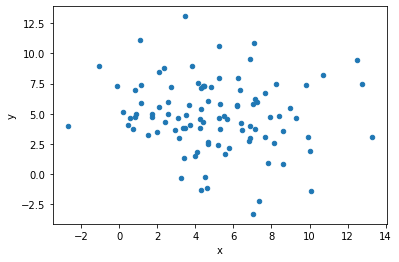

In [108]:
df.plot.scatter('x', 'y'); 
# Nótese dónde está ubicado el origen (0,0)

Para normalizar una variable se puede recurrir a la siguiente formula:

$$X_{norm} = \frac{X - \mu}{\sigma}$$

In [109]:
#Usando operadores numéricos en los datos para crear transformar las variables en sus versiones normalizadas.
#NOTA: Tenga cuidado de usar solo variables numéricas en las operaciones matemáticas.

df_norm =(df - df.mean())/df.std()

df_norm

,x,y
0,-0.125528,-2.039244
1,-0.618538,-0.063163
2,-0.496453,2.819400
3,1.033512,-0.767001
4,0.878009,-0.607128
...,...,...
95,1.072755,0.893488
96,0.475275,-0.221010
97,-1.978862,1.419805
98,0.960635,-0.044065


In [110]:
# Valores del DataFrame normalizado.

df_norm.mean() #Aproximadamente 0.

x   -9.769963e-17
y    6.350476e-16
dtype: float64

In [111]:
df_norm.std()

x    1.0
y    1.0
dtype: float64

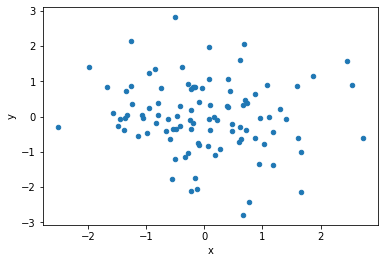

In [112]:
df_norm.plot.scatter('x', 'y'); # Misma forma, diferente posición y rango.
# Nótese dónde está ubicado el origen ahora (0,0)

De igual manera, mediante operaciones con Series y DataFrames es posible llevar a cabo otras tareas comunes de preprocesamiento y transformación de datos. Algunas de ellas son:

*  **Codificación:** Cambiar la representación o tipo de una variable a otra, como en la discretización.
*  **Reescalado:** Modificar en conjunto la forma y dimensión de un conjunto de datos para obtener un rango coincidente entre variables.
*  **Centrado:** Modificación de todos los datos de forma que sus medidas de tendencia central se desplacen a un punto de referencia nuevo.
*  **Filtrado:** Eliminación de los componentes de ruido de un conjunto de datos con métodos de limpieza de señales.

No obstante, otras tareas más complejas de preprocesamiento y transformación de datos podrían requerir de módulos especializados de *Python*. Uno de los módulos más populares es el módulo [**`preprocessing`**](https://scikit-learn.org/stable/modules/preprocessing.html) de la librería para aprendizaje de máquina **_scikit-learn_** que se discutirá en el **Módulo 2**.

## **Recursos adicionales**
---

Si desea profundizar en los temas estudiados en esta guía, le invitamos consultar la [documentación oficial](https://pandas.pydata.org/pandas-docs/stable/reference/index.html), y en especial la [Guía de usuario](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) de *pandas*. 

Además, a continuación se presenta una lista de recursos adicionales que le serán de utilidad:

*  [University of California San Diego. Coursera - Machine Learning With Big Data](https://www.coursera.org/learn/big-data-machine-learning)
*  [Data vedas - Exploración y preparación de los datos](https://www.datavedas.com/data-exploration-and-preparation/)
*  [Kaggle - Pandas](https://www.kaggle.com/learn/pandas)
*  [CodeCademy - Learn Data Analysis with Pandas](https://www.codecademy.com/learn/data-processing-pandas)
*  [University of Michigan. Coursera - Applied Data Science with Python Specialization](https://www.coursera.org/specializations/data-science-python)

## **Créditos**

* **Profesor:** [Felipe Restrepo Calle](https://dis.unal.edu.co/~ferestrepoca/)
* **Asistentes docentes:**
  - Alberto Nicolai Romero Martínez
  - Miguel Angel Ortiz Marín

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*